# Análise dos dados de sensores veiculares

[Andressa Oliveira](https://github.com/AndressaStefany), [Emerson Vilar](https://github.com/EmersonVilar),  [Gisliany Alves](https://github.com/gisliany) e [Marianne Diniz](https://github.com/MarianneDiniz)

## Introdução

O mercado automobilístico vem crescendo nos últimos anos, facilitando o surgimento de novos segmentos de mercado. Com o auxílio da Tecnologia da Informação, os automóveis foram sendo melhorados, também disponibilizando uma série de informações computadorizadas.

Sabe-se que o número de veículos em todo o mundo aumentou de cerca de 900 milhões em 2006 para mais de 1 bilhão em 2014, devendo chegar a 2 bilhões até 2035. Nesse contexto, a maioria desses veículos que surgirão até 2035 serão carros conectados que irão possuir a capacidade de comunicação sem fio com vários tipos de dispositivos (sensores, telefones, câmeras) conectados à Internet, utilizando uma variedades de protocolos de comunicação e mídias de transmissão. Além disso, 25 bilhões de dispositivos serão conectados à Internet até 2020.

Nesse contexto, é visto que os dados oriundos desses sensores e sistemas veiculares podem ser extraídos pelo veículo de forma automatizada, a partir de protocolos de comunicação padronizados para a área veicular. E essas informações podem ser exploradas para interações em um novo contexto de processamento e comunicação, revolucionado a forma como veículos são utilizados.

Assim, para coletar uma série de dados dos veículos em tempo real, tais como o status da luz da injeção eletrônica, códigos de diagnóstico de problemas *Diagnostic Trouble Codes* (DTCs), rotação do motor, velocidade, temperatura do líquido de arrefecimento, dentre outros, é utilizada a tecnologia **On-Board Diagnostics** (OBD) que refere-se a um sistema de autodiagnóstico disponível na maioria dos veículos que circulam atualmente. A leitura dos dados é realizada a partir de um dispositivo plug and play diretamente na *Engine Control Unit* (ECU) do veículo.

Dessa forma, o dataset foi coletado por meio da plataforma SensorSt. A plataforma possui 3 módulos, capaz de coletar e analisar, a partir do OBD, os dados dos sensores disponíveis nos veículos afim de criar métricas de manutanção, utilização, consumo dos mesmos, entre outros.

### Visão geral dos dados

In [0]:
# Importação dos dados

import pandas as pd
import matplotlib.pyplot as plt

car = pd.read_csv("ivan_car_datetime_index.csv", parse_dates=['dateTime'])

Cada linha representa uma leitura dos dados de todos os sensores. Ao todo, são 17 atributos no dataset, explicados na tabela a seguir.

In [73]:
car.head()

,dateTime,AIR_INTAKE_TEMP,CONTROL_MODULE_VOLTAGE,DISTANCE_TRAVELED_MIL_ON,ENGINE_RPM,MAF,PENDING_TROUBLE_CODES,PERMANENT_TROUBLE_CODES,SPEED,THROTTLE_POS,TROUBLE_CODES,VIN,id,plate,ALTITUDE,LATITUDE,LONGITUDE
0,2018-10-09 10:12:41.524,30.0,14.120,0,1043,3.52,[C0700],[],39,14.509804,[C0300],unknown_id,5bbc7f1a1e12a30c2e910a3f,QGJ1172,43.738159,-5.852685,-35.210335
1,2018-10-09 10:12:42.812,30.0,14.123,0,991,3.38,[C0700],[],38,14.117647,[C0300],unknown_id,5bbc7f1b1e12a30c2e910a40,QGJ1172,42.152222,-5.852508,-35.210292
2,2018-10-09 10:12:44.144,30.0,14.160,0,975,3.52,[C0700],[],37,14.117647,[C0300],unknown_id,5bbc7f1c1e12a30c2e910a41,QGJ1172,43.035278,-5.852417,-35.210259
3,2018-10-09 10:12:45.362,30.0,14.124,0,1275,3.36,[C0700],[],34,14.117647,[C0300],unknown_id,5bbc7f1e1e12a30c2e910a42,QGJ1172,44.030884,-5.852336,-35.210230
4,2018-10-09 10:12:46.495,30.0,14.160,0,1146,2.83,[C0700],[],33,14.117647,[C0300],unknown_id,5bbc7f1f1e12a30c2e910a43,QGJ1172,43.800293,-5.852260,-35.210198


In [74]:
car.columns

Index(['dateTime', 'AIR_INTAKE_TEMP', 'CONTROL_MODULE_VOLTAGE',
       'DISTANCE_TRAVELED_MIL_ON', 'ENGINE_RPM', 'MAF',
       'PENDING_TROUBLE_CODES', 'PERMANENT_TROUBLE_CODES', 'SPEED',
       'THROTTLE_POS', 'TROUBLE_CODES', 'VIN', 'id', 'plate', 'ALTITUDE',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

<center>**Descrição das Colunas** </center>

| coluna          | descrição                                                
|-----------------|-----------------------------------------------------------|
| dateTime          | Data e Hora do Percurso
| AIR_INTAKE_TEMP          | Temperatura de Entrada de Ar
| CONTROL_MODULE_VOLTAGE         | Voltagem da Bateria
| DISTANCE_TRAVELED_MIL_ON         | Distância Percorrida com a luz da injeção eletrônica acesa
| ENGINE_RPM        | Rotação por minuto
| MAF        | Sensor de Fluxo de Ar 
| PENDING_TROUBLE_CODES         | Códigos de Erros Pendentes
| PERMANENT_TROUBLE_CODES           | Códigos de Erros Permanentes
| SPEED           | Velocidade
| THROTTLE_POS        | Medida para a pisada no pedal de aceleração
| TROUBLE_CODES      | códigos de Erro
| VIN         | Número do Chassi do Veículo 
| ID          | Id do Veículo
| PLATE      | Placa do Veículo
| ALTITUDE      | Altitude
|LATITUDE           | Latitude
| LONGITUDE          | Longitude

O método `info()` é útil para termos uma breve descrição dos dados. Particularmente, obtém-se o número total de linhas e o tipo e número de valores não-nulos de cada atributo.

In [75]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 17 columns):
dateTime                    13954 non-null datetime64[ns]
AIR_INTAKE_TEMP             13954 non-null float64
CONTROL_MODULE_VOLTAGE      13954 non-null float64
DISTANCE_TRAVELED_MIL_ON    13954 non-null int64
ENGINE_RPM                  13954 non-null int64
MAF                         13954 non-null float64
PENDING_TROUBLE_CODES       13954 non-null object
PERMANENT_TROUBLE_CODES     13954 non-null object
SPEED                       13954 non-null int64
THROTTLE_POS                13954 non-null float64
TROUBLE_CODES               13954 non-null object
VIN                         13954 non-null object
id                          13954 non-null object
plate                       13954 non-null object
ALTITUDE                    13954 non-null float64
LATITUDE                    13954 non-null float64
LONGITUDE                   13954 non-null float64
dtypes: datetime64[ns](1), fl

Como se pode observar, o dataset contém 13954 linhas e não há dados faltantes em nenhuma coluna. A seguir, o método describe() mostra um resumo estatístico dos atributos numéricos.

In [76]:
car.describe()

,AIR_INTAKE_TEMP,CONTROL_MODULE_VOLTAGE,DISTANCE_TRAVELED_MIL_ON,ENGINE_RPM,MAF,SPEED,THROTTLE_POS,ALTITUDE,LATITUDE,LONGITUDE
count,13954.000000,13954.000000,13954.0,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000
mean,34.862548,14.092505,0.0,1360.045005,8.281964,28.439946,17.669795,40.058434,-5.855213,-35.212459
std,3.666960,0.149372,0.0,372.897346,5.722785,19.650312,3.951480,7.302196,0.052319,0.298180
min,29.000000,12.920000,0.0,543.000000,0.970000,0.000000,10.588235,0.000000,-5.876566,-35.225599
25%,32.000000,14.020000,0.0,997.000000,3.527500,12.000000,14.509804,35.093170,-5.872117,-35.220951
50%,33.000000,14.113000,0.0,1365.000000,5.300000,26.500000,16.078432,40.426392,-5.857663,-35.212786
75%,37.000000,14.184500,0.0,1633.000000,12.440000,42.000000,20.392157,45.046463,-5.838910,-35.210040
max,48.000000,14.649000,0.0,3208.000000,30.690000,84.000000,31.764706,60.661987,0.000000,0.000000


 Os histogramas dos dados numéricos são mostrados abaixo, provendo uma visualização da distribuição das instâncias.

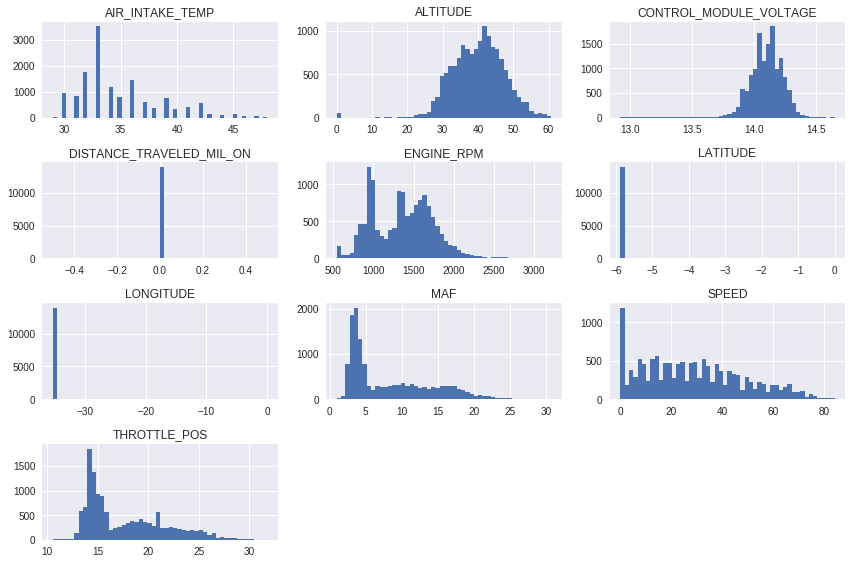

In [77]:
car.hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()

## Descobrindo e visualizando dados para ter insights

Vamos acrescentar o dia da semana para cada observação do dataset. Na sequência, analisemos a média das velocidades.

In [0]:
car['WEEKDAY'] = pd.to_datetime(car['dateTime']).dt.weekday_name # acréscimo do dia da semana

In [0]:
media_car = car.groupby(['WEEKDAY', 'SPEED']).size().groupby(level=0).mean()

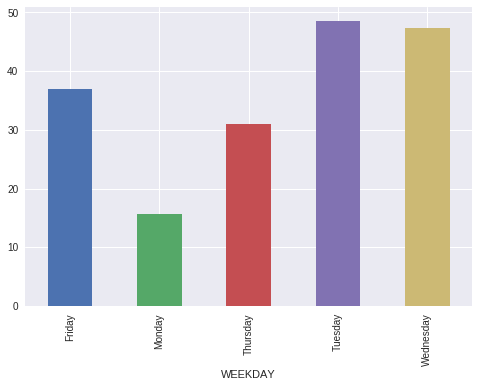

In [80]:
media_car.plot.bar()

O gráfico acima revela que a segunda-feira é o dia da semana em que a média da velocidade é menor, isto é, provavelmente é o dia em que o percurso de ida piora por causa do congestionamento. Aparentemente, os dias de melhor fluxo, em que se atinge maiores velocidades, são a terça e a quarta.

In [81]:
df = car[['WEEKDAY', 'dateTime', 'SPEED']]
df['date'] = df['dateTime'].map(lambda x: x.strftime('%d-%m-%Y'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
import numpy as np

parado = {}

days = list(df['date'].unique())

for day in days:
    start, stop = [0, 0]
    day_df = df[df['date'] == day]
    for i,(index, row) in enumerate(day_df.iterrows()):
        if row['date'] not in parado:
            parado[row['date']] = 0
        if row['SPEED'] == 0:
            if start == 0:
                start = row['dateTime']
            stop = row['dateTime']
        if (row['SPEED'] != 0 or (i == len(day_df) - 1 and row['SPEED'] == 0)) and start != 0 and stop != 0:
            parado[row['date']] += (stop - start).total_seconds()
            start, stop = [0, 0]

new_df = pd.DataFrame.from_dict(parado, orient='index').reset_index()
new_df.rename(columns={ 'index': 'date', 0: 'duration' }, inplace=True)
new_df['weekday'] = pd.to_datetime(new_df['date'], format="%d-%m-%Y").dt.weekday_name
time_stoped = new_df.pivot_table(index="weekday", values="duration", aggfunc=np.mean).reset_index()

Text(0,0.5,'lost time')

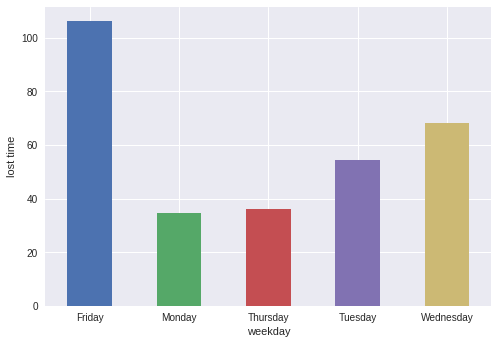

In [83]:
plt = time_stoped.plot.bar(x='weekday', y='duration', rot=0, legend=False)
plt.set_ylabel('lost time')

In [84]:
corr_matrix = car.corr()
corr_matrix["ENGINE_RPM"].\
  sort_values(ascending=False)

ENGINE_RPM                  1.000000
THROTTLE_POS                0.772564
MAF                         0.725546
SPEED                       0.517000
CONTROL_MODULE_VOLTAGE      0.193708
ALTITUDE                   -0.007366
LONGITUDE                  -0.015045
LATITUDE                   -0.065045
AIR_INTAKE_TEMP            -0.262147
DISTANCE_TRAVELED_MIL_ON         NaN
Name: ENGINE_RPM, dtype: float64

In [0]:
car_corr = car[["ENGINE_RPM", "THROTTLE_POS", "MAF", "SPEED"]]

In [86]:
#normalizando os dados
car_norm=(car_corr - car_corr.mean())/car_corr.std()
car_norm

,ENGINE_RPM,THROTTLE_POS,MAF,SPEED
0,-0.850221,-0.799698,-0.832106,0.537399
1,-0.989669,-0.898941,-0.856570,0.486509
2,-1.032576,-0.898941,-0.832106,0.435619
3,-0.228065,-0.898941,-0.860065,0.282950
4,-0.574005,-0.898941,-0.952677,0.232060
5,-0.874356,-0.998184,-0.971898,0.028501
6,-1.043303,-1.097427,-1.020825,-0.022389
7,-1.054030,-1.097427,-0.447678,-0.276838
8,0.482586,-0.005754,-0.797158,-0.276838
9,0.715894,0.391219,-0.865307,-0.327727


Text(0.5,0,'Start of the route')

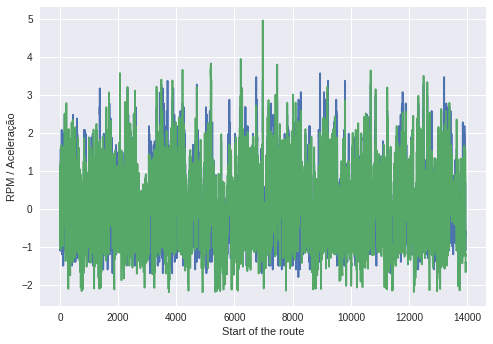

In [89]:
#plot do gráfico
plt.plot( car_norm['THROTTLE_POS'], label='ACELERAÇÃO')
plt.plot(car_norm['ENGINE_RPM'], label = 'RPM')
#plt.plot(car_norm['SPEED'], label = 'SPEED')
#plt.plot(car_norm['MAF'], label= 'MAF')
plt.ylabel('RPM / Aceleração')
plt.xlabel('Start of the route')
#plt.legend()
#plt.savefig('NISSAN_KICKS.png', transparent = True)
#plt.show()

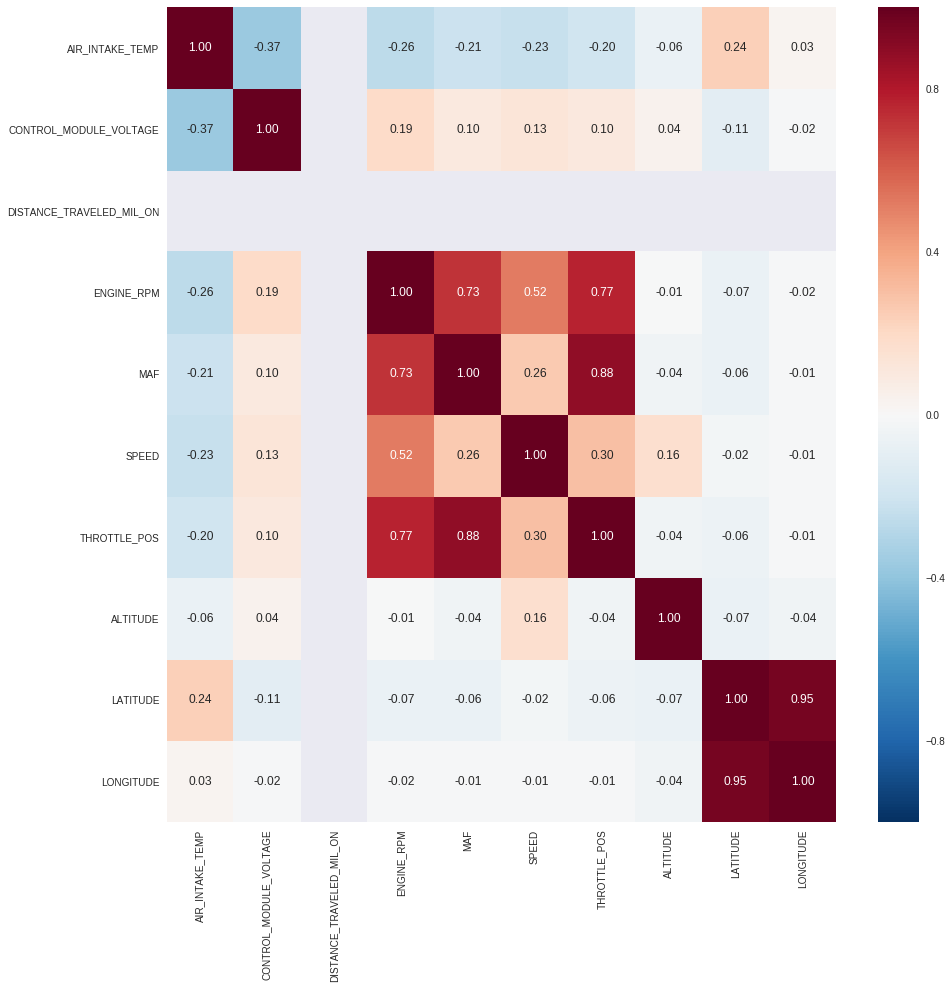

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
sns.heatmap(car.corr(), 
            annot=True, fmt=".2f")

In [0]:
# Limitando as colunas
x_last_trip = car[[
    'LATITUDE',
    'LONGITUDE',
    'SPEED'
]]

In [91]:
x_last_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 3 columns):
LATITUDE     13954 non-null float64
LONGITUDE    13954 non-null float64
SPEED        13954 non-null int64
dtypes: float64(2), int64(1)
memory usage: 327.1 KB


In [92]:
# Eliminar as linhas com algum valor nulo
x_last_trip.dropna(axis=0, inplace=True)
x_last_trip.reset_index(drop=True, inplace=True)

# Dataset higienizado
x_last_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 3 columns):
LATITUDE     13954 non-null float64
LONGITUDE    13954 non-null float64
SPEED        13954 non-null int64
dtypes: float64(2), int64(1)
memory usage: 327.1 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
# 0.5 doesn't support tooltip, must install dev instead
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-q5pb27f0
  Running setup.py bdist_wheel for folium ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-jczie45_/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.7.0+6.gf4d024d which is incompatible.
  Found existing installation: folium 0.2.1
    Uninstalling folium-0.2.1:
      Successfully uninstalled folium-0.2.1


In [94]:
import numpy as np
print(max(x_last_trip['SPEED']))
np.mean(x_last_trip['SPEED'])

84


28.43994553533037

In [0]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Criar uma lista com [[lat,log,propriedade]]
coordinates = [[x_last_trip.iloc[i]['LATITUDE'], x_last_trip.iloc[i]['LONGITUDE'], x_last_trip.iloc[i]['SPEED']] for i in range(len(x_last_trip))]

In [96]:
np_coordinates = np.array(coordinates)
[np.median(np_coordinates[:, 0]), np.median(np_coordinates[:, 1])]

[-5.8576629, -35.21278615]

In [97]:
#create map object
map_speed = folium.Map(
    location = [np.mean(np_coordinates[:, 0]), np.mean(np_coordinates[:, 1])],
    zoom_start= 13
)

# Valor máximo da propriedade com o intuito de normalizar os graficos
max_speed = x_last_trip['SPEED'].max()
print(max_speed)

HeatMap(coordinates, max_val=max_speed).add_to(map_speed)

map_speed

84


## Dividindo os dados de treino e teste

Abaixo é usada a função *train_test_split* do sklearn, a qual dividirá os dados para o treino (*X_train* e *y_train*) e para o teste (*X_test* e *y_test*), sendo 33% dos dados para o teste e o restante irá ser utilizado para o treino do modelo. A coluna *SPEED* será o que se quer predizer, ou seja, o y.

In [0]:
from sklearn.model_selection import train_test_split

# dividindo o dataset em treino e teste
X = car.drop('SPEED',axis=1)
y = car['SPEED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Tratamento dos Dados (Pipeline)

Para realilzar o tratamento dos dados, utilizamos um Pipeline com a sequência de limpezas. Primeiramente, verificou-se que o conjunto de dados não tem dados faltantes, então nenhuma estratégia de imputação se fez necessária.  O tratamento dos dados numéricos se deu apenas em duas etapas: seleção de atributos e escalonamento dos dados entre 0 e 1. O tratamento categórico, por sua vez, também contempla a seleção dos atributos (no caso, apenas o dia da semana)  e a codificação das colunas categóricas em numéricas.

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class Selector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

In [0]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, Imputer
# from future_encoders import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# num_attribs = car.select_dtypes(include=['int', 'float']).columns
num_attribs = X_train.select_dtypes(include=['int', 'float']).columns
cat_attribs = ['WEEKDAY']

num_pipeline = Pipeline([('selector', Selector(attribute_names=num_attribs)),
                         ('std_scaler', StandardScaler())
                        ])

cat_pipeline = Pipeline([('selector', Selector(attribute_names=cat_attribs)),
                         ('cat_encoder', OneHotEncoder(sparse=False))
                        ])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])

In [0]:
def clean_df(df):
  data = full_pipeline.fit_transform(df)
  cat_encoder = cat_pipeline.named_steps['cat_encoder']

  columns = list(num_attribs)
  columns = columns + list(cat_encoder.categories_[0])
  return pd.DataFrame(data, columns=columns)

In [181]:
car_new = clean_df(car)
car_new.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,AIR_INTAKE_TEMP,CONTROL_MODULE_VOLTAGE,DISTANCE_TRAVELED_MIL_ON,ENGINE_RPM,MAF,THROTTLE_POS,ALTITUDE,LATITUDE,LONGITUDE,Friday,Monday,Thursday,Tuesday,Wednesday
0,-1.326091,0.184080,0.0,-0.850251,-0.832136,-0.799727,0.503938,0.048336,0.007123,0.0,0.0,0.0,1.0,0.0
1,-1.326091,0.204167,0.0,-0.989705,-0.856600,-0.898973,0.286744,0.051715,0.007266,0.0,0.0,0.0,1.0,0.0
2,-1.326091,0.451878,0.0,-1.032613,-0.832136,-0.898973,0.407679,0.053447,0.007376,0.0,0.0,0.0,1.0,0.0
3,-1.326091,0.210858,0.0,-0.228074,-0.860095,-0.898973,0.544027,0.054999,0.007473,0.0,0.0,0.0,1.0,0.0
4,-1.326091,0.451878,0.0,-0.574026,-0.952711,-0.898973,0.512448,0.056458,0.007580,0.0,0.0,0.0,1.0,0.0


## Selecionando e treinando modelos

Abaixo, é utilizado o pipeline para a preparação dos dados de *X_train* e *X_test*. Posteriormente, foram escolhidos os algoritmos de **Regressão Linear, K-ésimo Vizinhos mais Próximos (KNN), Árvore de Decisão e Floresta Randômica** para ser feita a predição da velocidade. Em todos esses casos, será treinado um modelo e em seguida feita a predição, depois é feito o cálculo do erro médio quadrado da predição, como também é ralizada a *Cross Validation* utilizando o **K-fold**. Ademais, um outro score também foi calculado, o R2 score, o qual fornece uma medida de quão bem os resultados observados são replicados pelo modelo, com base na proporção da variação total de resultados podendo chegar até 1.0, quanto menor o valor, pior é o modelo.

E então, será analisado qual algoritmo melhor se adequa ao caso.

In [146]:
# preparando os dados
X_train_prepared = clean_df(X_train)
X_test_prepared = clean_df(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 1.0 Regressão Linear

Regressão Linear é um dos algoritmos mais simples utilizado para a predição, do ponto de vista da implementação do Scikit-Learn, é apenas os mínimos quadrados ordinários (scipy.linalg.lstsq) envolvidos como um objeto preditivo.

In [182]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_prepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Agora com o modelo treinado, será feita as predições com os dados de teste e calculado o erro quadrado médio:

In [183]:
from sklearn.metrics import mean_squared_error

speed_predictions = lin_reg.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, speed_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

17.03999557740655

In [184]:
len(y_test)

3489

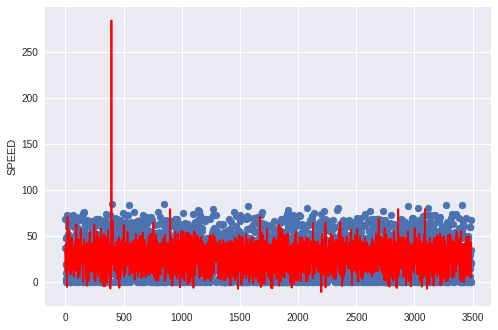

In [185]:
import matplotlib.pyplot as plt

X = range(0,3489)
y = y_test

#visualize results
plt.scatter(X,y)
plt.plot(X,speed_predictions,color='red')
plt.ylabel('SPEED')

plt.show()

Mesmo o erro obtido sendo 17.039, não é relativamente alto, pois o speed varia de 0 a 84.

Agora, será feita a validação do modelo utilizando o **k-fold**:

In [186]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# kfold instance
kf = KFold(10, shuffle=True, random_state=1)

lin_mses = cross_val_score(lin_reg, 
                       X_train_prepared, 
                       y_train, 
                       scoring="neg_mean_squared_error", 
                       cv=kf)

# root mean squared error
lin_rmses = np.sqrt(np.absolute(lin_mses))

# average error
lin_avg_rmse = np.mean(lin_rmses)

print(lin_rmses)
print(lin_avg_rmse)

[15.48380118 15.91987446 15.50859884 15.47987984 15.8034454  15.71042696
 15.1230218  15.66782511 14.66046679 15.79168267]
15.514902305551


É possível observar que houve uma diminuição no erro com a utilização do **k-fold**.

In [187]:
from sklearn.metrics import r2_score

r2_score(y_test, speed_predictions)

0.24609321978674215

### 2.0 K-ésimo Vizinhos mais Próximos - KNN

O algoritmo **KNeighborsRegressor** do Scikit-Learn implementa a aprendizagem de vizinhos mais próximos sem supervisão. Ele atua como uma interface uniforme para três algoritmos diferentes de vizinhos mais próximos: BallTree, KDTree e um algoritmo de força bruta baseado em rotinas em sklearn.metrics.pairwise. Foi deixado os parâmetros default, onde o valor *algorithm* é 'auto', dessa forma, o algoritmo tenta determinar a melhor abordagem a partir dos dados de treinamento.

In [188]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_prepared, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [189]:
knn_speed_predictions = knn.predict(X_test_prepared)

# calculando o erro médio quadrado
knn_mse = mean_squared_error(y_test, knn_speed_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

18.86152188288652

In [190]:
# cross validation (knn,x,y,scoring,kfold)
knn_mses = cross_val_score(knn, 
                       X_train_prepared, 
                       y_train, 
                       scoring="neg_mean_squared_error", 
                       cv=10)

# root mean squared error
knn_rmses = np.sqrt(np.absolute(knn_mses))

# average error
knn_avg_rmse = np.mean(knn_rmses)

print(knn_rmses)
print(knn_avg_rmse)

[10.58924866 10.48185771 10.58699171 10.22543974  9.80202501  9.9733028
 10.65946199 10.4291546  11.09224662 10.32381086]
10.41635397106809


O erro médio com o algoritmo KNN foi um pouco maior que o da Regressão Linear, porém, na validação o desempenho foi melhor.

In [191]:
r2_score(y_test, knn_speed_predictions)

0.07629741858157335

#### 2.1 Utilizando GridSearch

In [157]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

n_neighbors = [7,10,15,20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,20,5))

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "neg_mean_squared_error")

gd.fit(X_train_prepared, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-102.2456029596541
KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  6.8min finished


In [158]:
knn_gs = KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')

knn_gs.fit(X_train_prepared, y_train)

knn_gs_speed_predictions = knn_gs.predict(X_test_prepared)

# calculando o erro médio quadrado
knn_gs_mse = mean_squared_error(y_test, knn_gs_speed_predictions)
knn_gs_rmse = np.sqrt(knn_gs_mse)
knn_gs_rmse

18.307936254120612

É possivel notar uma pequena melhora no erro médio após o uso do Grid Search para a escolha dos melhores parâmetros de treinamento.

In [159]:
# cross validation (knn,x,y,scoring,kfold)
knn_mses = cross_val_score(knn_gs, 
                       X_train_prepared, 
                       y_train, 
                       scoring="neg_mean_squared_error", 
                       cv=10)

# root mean squared error
knn_rmses = np.sqrt(np.absolute(knn_mses))

# average error
knn_avg_rmse = np.mean(knn_rmses)

print(knn_rmses)
print(knn_avg_rmse)

[10.29093192 10.13034494 10.31205039  9.98113785  9.46834922  9.88104266
 10.34132847 10.04920454 10.57893114 10.04221746]
10.107553859565956


In [160]:
r2_score(y_test, knn_gs_speed_predictions)

0.12972305826396258

### 3.0 Árvore de Decisão

Nessa sessão, é usado o DecisionTreeRegressor do Scikit-Learn com os valores default do algoritmo, os quais definem o número mínimo para haver a divisão de um nó e o número máximo da altura da árvore, por exemplo. 

In [204]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train_prepared, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [205]:
tree_speed_predictions = dec_tree.predict(X_test_prepared)

tree_mse = mean_squared_error(y_test,tree_speed_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

22.400437339627818

In [206]:
tree_mses = cross_val_score(dec_tree, 
                       X_train_prepared, 
                       y_train, 
                       scoring="neg_mean_squared_error", 
                       cv=kf)

# root mean squared error
tree_rmses = np.sqrt(np.absolute(tree_mses))

# average error
tree_avg_rmse = np.mean(tree_rmses)

print(tree_rmses)
print(tree_avg_rmse)

[9.56713572 9.51272209 8.86339068 8.90601462 9.79488785 8.25519131
 8.72338893 9.39549544 9.99297076 9.45230556]
9.246350296565684


O erro médio da predição da árvore de decisão foi o maior dentre os algoritmos utilizados, mas na *Cross Validation* o comportamento foi similar ao do KNN.

In [207]:
r2_score(y_test, tree_speed_predictions)

-0.30284181416274536

### 4.0 Floresta Randômica

Uma floresta aleatória é um estimador que se ajusta a várias árvores de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo. O único parâmetro diferente do default escolhido foi o *random_state* igual a 50, o qual representa a semente usada pelo gerador de números aleatórios. No caso dessa modificação de *random_state*, foram testados alguns valores como none, 1, 35, 35, 60 e o que teve menor erro médio foi 50.

In [208]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(random_state=50)

rand_forest.fit(X_train_prepared,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

In [209]:
forest_speed_predictions = rand_forest.predict(X_test_prepared)

forest_mse = mean_squared_error(y_test,forest_speed_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18.50605719899435

In [210]:
forest_mses = cross_val_score(rand_forest, 
                       X_train_prepared, 
                       y_train, 
                       scoring="neg_mean_squared_error", 
                       cv=kf)

# root mean squared error
forest_rmses = np.sqrt(np.absolute(forest_mses))

# average error
forest_avg_rmse = np.mean(forest_rmses)

print(forest_rmses)
print(forest_avg_rmse)

[7.03922901 7.42150647 7.2185768  7.06237593 7.67573236 6.86125751
 6.98345833 6.64387396 7.3672944  7.45721897]
7.173052373786622


A Floresta Randômica foi o que obteve melhor resultado na valadição, tendo a média do erro igual a 7.17, enquanto os demais obtiveram erros maiores que 10.

In [211]:
r2_score(y_test, forest_speed_predictions)

0.1107855857724318

#### 4.1 Utilizando GridSearch

In [212]:
hyperparams = {'bootstrap': [True], 'max_depth': [80, 90, 100], 
               'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 
               'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300]
               }

gd = GridSearchCV(estimator = RandomForestRegressor(), param_grid = hyperparams, verbose=True, 
                cv=5, scoring = "neg_mean_squared_error")

gd.fit(X_train_prepared, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 29.5min finished


-71.35066396168854
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)


In [213]:
rand_forest_gs = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

rand_forest_gs.fit(X_train_prepared,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [214]:
forest_gs_speed_predictions = rand_forest_gs.predict(X_test_prepared)

forest_mse = mean_squared_error(y_test,forest_gs_speed_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

14.81632903600759

In [215]:
forest_mses = cross_val_score(rand_forest_gs, 
                       X_train_prepared, 
                       y_train, 
                       scoring="neg_mean_squared_error", 
                       cv=kf)

# root mean squared error
forest_rmses = np.sqrt(np.absolute(forest_mses))

# average error
forest_avg_rmse = np.mean(forest_rmses)

print(forest_rmses)
print(forest_avg_rmse)

[7.96366778 8.50269163 8.26543334 8.14615045 8.64248908 8.09154564
 7.94907158 8.13049903 8.34578071 8.47887546]
8.251620470522608


É possível notar que o Grid Search trouxe uma melhora significativa no erro médio da Floresta, porém usando o Cross Validation  os resultados não se sairam melhores .

In [216]:
r2_score(y_test, forest_speed_predictions)

0.1107855857724318